# ML Project - Insurance Prediction using Linear Regression

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## To Ignore Warning

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import File

In [3]:
cd C:\Users\Dell\OneDrive\Desktop\Datasets

C:\Users\Dell\OneDrive\Desktop\Datasets


In [4]:
df=pd.read_csv("Insurance Prediction.csv")

## Data Loading

### Display Top 5 Rows of the Dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Display Last 5 Rows of the Dataset 

In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Shape of the Dataset (Number of Rows and Columns)

In [7]:
df.shape

(1338, 7)

### Information of the Dataset

In [8]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### Information about the Data Types used in the Dataset

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Finding Missing Values

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Overall Statistics about the Dataset

In [11]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## Visualization

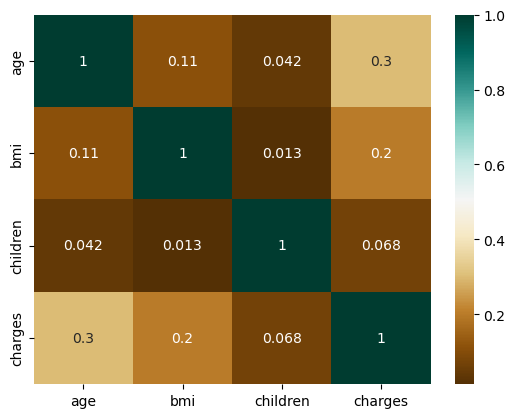

In [18]:
sns.heatmap(df.corr(), cmap="BrBG", annot = True)
plt.show()

### Encoding Data

In [25]:
dummy_df=pd.get_dummies(df,drop_first=True)

In [26]:
dummy_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_scal=StandardScaler()

In [27]:
new_df=pd.DataFrame(std_scal.fit_transform(df),columns=df.columns)

In [28]:
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


## Model Building

### Splitting and Testing

In [29]:
X=new_df.drop('charges',axis=1)
Y=new_df['charges']

In [30]:
X.shape

(1338, 8)

In [31]:
Y.shape

(1338,)

### Model Initialization

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [33]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
428,-1.296362,-2.271753,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
226,-0.797954,1.213372,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
867,1.266881,2.138583,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
397,-1.296362,0.058499,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418
300,-0.228344,-0.510736,1.580926,0.989591,-0.507463,-0.566418,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...
1180,0.198863,1.748977,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1147,-1.367563,0.206139,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
527,0.839674,-0.797813,-0.078767,-1.010519,-0.507463,-0.566418,-0.611324,1.765481
1149,0.198863,0.563756,-0.908614,0.989591,-0.507463,-0.566418,-0.611324,1.765481


In [34]:
X_train.shape

(936, 8)

In [35]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
7,-0.157143,-0.479567,1.580926,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
999,-0.228344,-0.619825,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
1209,1.409283,1.055889,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
491,1.551686,-0.915925,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
625,-0.726752,-0.760083,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...
854,0.697271,-1.118520,1.580926,-1.010519,1.970587,-0.566418,-0.611324,-0.566418
554,-1.011557,1.748977,-0.908614,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1278,-0.014740,-0.121130,-0.078767,0.989591,1.970587,-0.566418,-0.611324,-0.566418
374,-1.367563,0.437442,-0.908614,0.989591,-0.507463,-0.566418,1.635795,-0.566418


In [36]:
X_test.shape

(402, 8)

In [37]:
Y_train

428    -0.834578
226    -0.874061
867    -0.139961
397     0.273932
300    -0.538903
          ...   
1180   -0.464223
1147   -0.909410
527    -0.281641
1149   -0.602263
1289   -0.505800
Name: charges, Length: 936, dtype: float64

In [38]:
Y_train.shape

(936,)

In [39]:
Y_test

7      -0.494728
999    -0.661073
1209   -0.076267
491     0.928725
625    -0.787573
          ...   
854     0.895172
554     0.380693
1278    0.759294
374    -0.981282
6      -0.415500
Name: charges, Length: 402, dtype: float64

In [40]:
Y_test.shape

(402,)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regression_model=LinearRegression()

In [43]:
regression_model.fit(X_train,Y_train)

LinearRegression()

### Prediction

In [44]:
predicted_value=regression_model.predict(X_test)

In [45]:
print(predicted_value)

[-0.38061502 -0.57898779  0.17024554 -0.16285157 -0.75719832 -0.30505974
 -0.30603677  1.04407627 -0.46659347  1.47119146 -0.91917646 -0.76642622
 -0.49307594 -0.16065202 -0.03025481 -0.13127078 -0.65277781  0.43601654
 -0.20314682  1.46879003  1.73877203 -0.71970173 -1.01225961 -0.49451245
 -0.74727777  0.05332505 -0.10914873 -0.18355435 -0.56422753  1.49036435
 -1.24946757  1.73881062 -0.32547605 -0.4796005  -0.44792272 -0.11786973
  0.05879913 -0.04585242 -0.27846155 -0.38311529  0.21359771 -0.23530587
 -0.60850274 -0.15292957 -0.67862173 -0.49921286 -0.54749091  1.7581233
 -0.17849888 -0.17369215  1.62155554 -0.66234441 -0.23390784  0.12519546
 -0.1848206  -0.00253615 -0.08711102 -0.4642285  -0.46033871  1.81331217
 -1.05939619  1.68493253  2.026777   -0.9944752   1.26628048 -0.27860468
 -0.57406549 -0.28581072 -0.40804136 -0.43804433 -0.49691974 -0.94167386
 -0.37795745 -0.25952237 -0.36768175 -0.02995332 -0.57637191 -0.20906014
 -1.15858225  0.01388    -0.11266506 -0.04761269  1.

In [46]:
Y_test

7      -0.494728
999    -0.661073
1209   -0.076267
491     0.928725
625    -0.787573
          ...   
854     0.895172
554     0.380693
1278    0.759294
374    -0.981282
6      -0.415500
Name: charges, Length: 402, dtype: float64

In [47]:
regression_model.score(X_test,Y_test)

0.7166124432331722

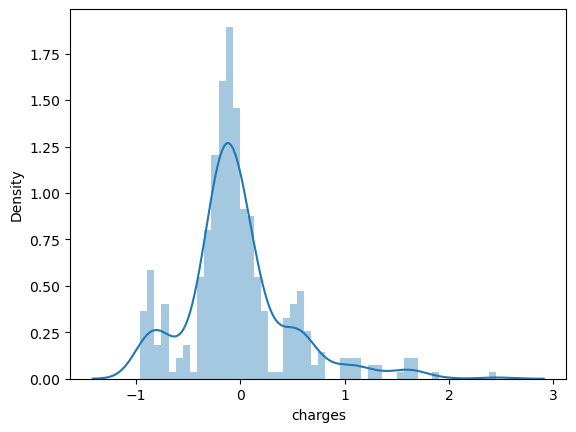

In [48]:
sns.distplot((Y_test-predicted_value),bins=50);

## Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
mse=mean_squared_error(Y_test,predicted_value)
r2=r2_score(Y_test,predicted_value)
mae=mean_absolute_error(Y_test,predicted_value)

In [53]:
print('Mean Squared Error:' ,mse)
print('R2 Score:' ,r2)
print('Mean Absolute Error:',mae)

Mean Squared Error: 0.25112196779522294
R2 Score: 0.7166124432331722
Mean Absolute Error: 0.34915145264750774
